## Matplotlib 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### MATLAB-style Interface

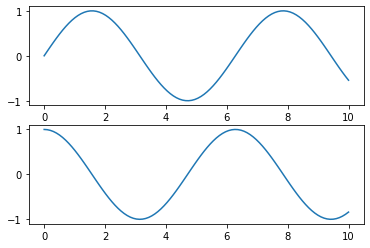

In [3]:
x = np.linspace(0, 10, 100)
plt.figure()  # create a plot figure


# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

### Object-oriented interface

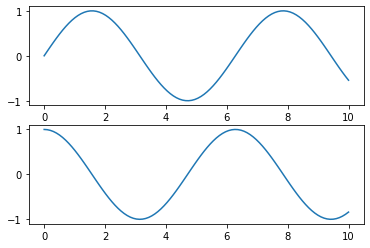

In [4]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

### Simple Line Plots

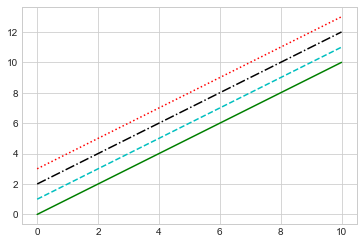

In [5]:
plt.style.use('seaborn-whitegrid')
x = np.linspace(0, 10, 1000)
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

### Simple Scatter Plots

(0, 1.8)

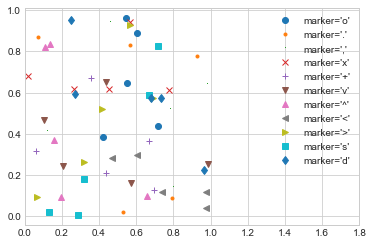

In [6]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8)

(-1.2, 1.2)

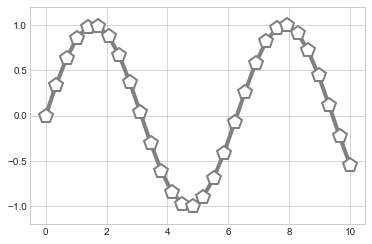

In [9]:
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2)

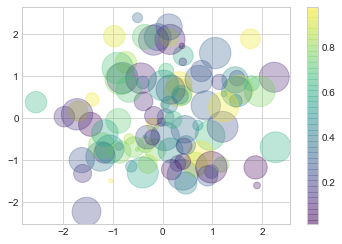

In [10]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

### Visualizing Errors 

Basic error bars:

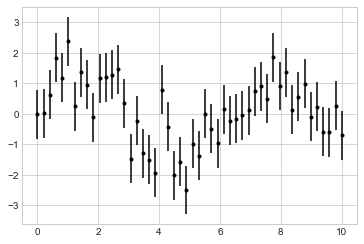

In [11]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

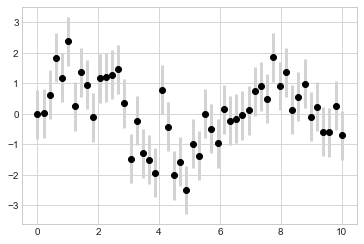

In [12]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

Continous Error Bars:

In [25]:
from sklearn.gaussian_process import GaussianProcessRegressor

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, y_std = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * np.sqrt(y_std)  # 2*sigma ~ 95% confidence region

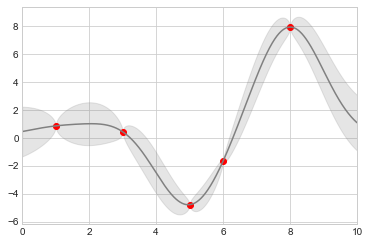

In [26]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);

### Density and Contour Plots

In [28]:
plt.style.use('seaborn-white')

In [30]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [31]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

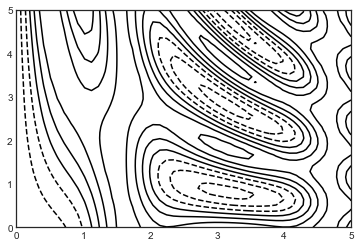

In [32]:
plt.contour(X, Y, Z, colors='black')

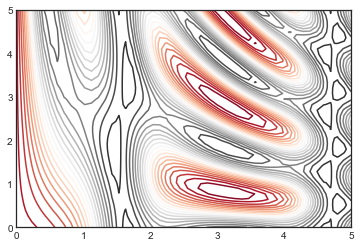

In [33]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

RdGy (short for Red-Gray) colormap is a good choice for centered data

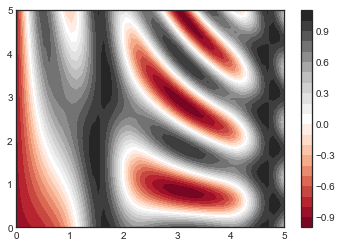

In [34]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

The colorbar makes it clear that the black regions are "peaks," while the red regions are "valleys."
Matplotlib must render a new polygon for each step in the level. A better way to handle this is to use the plt.imshow() function, which interprets a two-dimensional grid of data as an image.

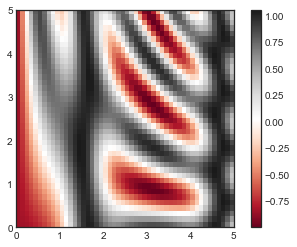

In [35]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image');

Partially transparent background image (with transparency set via the alpha parameter) and overplot contours with labels on the contours themselves (using the plt.clabel() function):

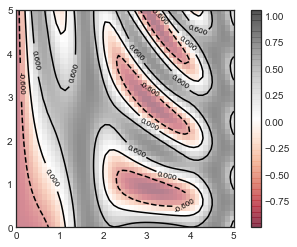

In [36]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

### Histograms, Binnings, and Density 

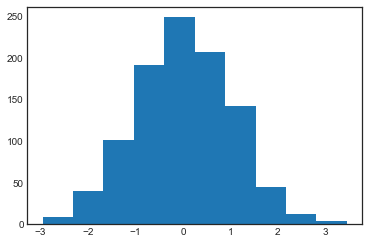

In [37]:
data = np.random.randn(1000)
plt.hist(data);

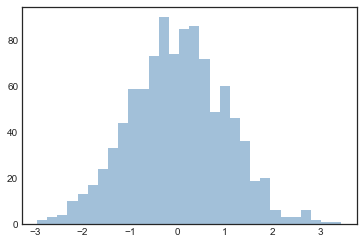

In [39]:
plt.hist(data, bins=30, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');


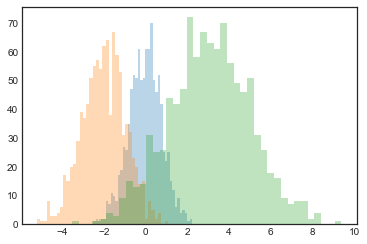

In [41]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

In [42]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 49 292 456 187  16]


2Dimensional Histogram using plt.hist2d:

In [43]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T


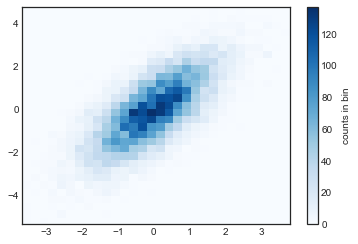

In [44]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

Hexagonal Binning:

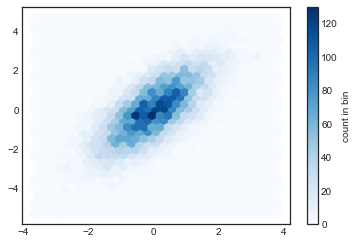

In [45]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')